Importing dependency

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import KFold ,cross_val_score ,train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print(sklearn.__version__)


Numpy version: 1.26.4
Pandas version: 2.1.4
Matplotlib version: 3.7.1
1.3.2


In [ ]:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

In [ ]:
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:
test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [ ]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
train.shape

(4920, 134)

In [ ]:
test.shape

(42, 133)

In [ ]:
print("describtion of train data (Numerical)")
print("**************************************\n")
train.describe().style.background_gradient(cmap='Reds')

describtion of train data (Numerical)
**************************************



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.0

In [ ]:
print("describtion of test data (Categoty)")
print("************************************\n")
train.describe(include="object").style.background_gradient(cmap='Blues')

describtion of test data (Categoty)
************************************



,prognosis
count,4920
unique,41
top,Fungal infection
freq,120


In [ ]:
print("describtion of test data (Numerical)")
print("*************************************\n")
test.describe().style.background_gradient(cmap='Blues')

describtion of test data (Numerical)
*************************************



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,0.023810,0.404762,0.047619,0.023810,0.404762,0.023810,0.023810,0.023810,0.047619,0.095238,0.047619,0.095238,0.023810,0.023810,0.119048,0.285714,0.023810,0.095238,0.142857,0.023810,0.047619,0.238095,0.190476,0.119048,0.238095,0.238095,0.023810,0.047619,0.047619,0.214286,0.119048,0.071429,0.023810,0.166667,0.023810,0.000000,0.023810,0.071429,0.142857,0.071429,0.071429,0.023810,0.023810,0.023810,0.023810,0.023810,0.142857,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.071429,0.023810,0.023810,0.047619,0.023810,0

In [ ]:
print("describtion of test data (Categoty)")
print("************************************\n")
test.describe(include="object").style.background_gradient(cmap='Blues')

describtion of test data (Categoty)
************************************



,prognosis
count,42
unique,41
top,Fungal infection
freq,2


In [ ]:
train.info(max_cols=134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [ ]:
train.info(max_cols=134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [ ]:
train["fluid_overload"].unique()

array([0])

In [ ]:
train['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
train['prognosis'].nunique()

41

In [ ]:
for col in train:
    print(f"{col} has {train[col].unique()}")

itching has [1 0]
skin_rash has [1 0]
nodal_skin_eruptions has [1 0]
continuous_sneezing has [0 1]
shivering has [0 1]
chills has [0 1]
joint_pain has [0 1]
stomach_pain has [0 1]
acidity has [0 1]
ulcers_on_tongue has [0 1]
muscle_wasting has [0 1]
vomiting has [0 1]
burning_micturition has [0 1]
spotting_ urination has [0 1]
fatigue has [0 1]
weight_gain has [0 1]
anxiety has [0 1]
cold_hands_and_feets has [0 1]
mood_swings has [0 1]
weight_loss has [0 1]
restlessness has [0 1]
lethargy has [0 1]
patches_in_throat has [0 1]
irregular_sugar_level has [0 1]
cough has [0 1]
high_fever has [0 1]
sunken_eyes has [0 1]
breathlessness has [0 1]
sweating has [0 1]
dehydration has [0 1]
indigestion has [0 1]
headache has [0 1]
yellowish_skin has [0 1]
dark_urine has [0 1]
nausea has [0 1]
loss_of_appetite has [0 1]
pain_behind_the_eyes has [0 1]
back_pain has [0 1]
constipation has [0 1]
abdominal_pain has [0 1]
diarrhoea has [0 1]
mild_fever has [0 1]
yellow_urine has [0 1]
yellowing_of_eyes

In [ ]:
train = train.drop("Unnamed: 133", axis=1)

In [ ]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

<Axes: xlabel='chills', ylabel='count'>

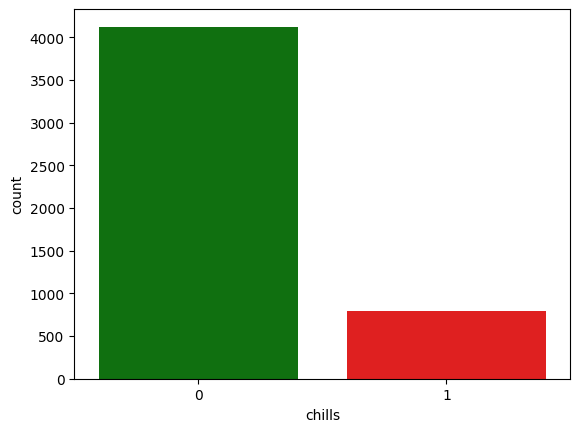

In [ ]:
sns.countplot(x='chills', data=train, palette=(['g','r']))

<Axes: xlabel='inflammatory_nails', ylabel='count'>

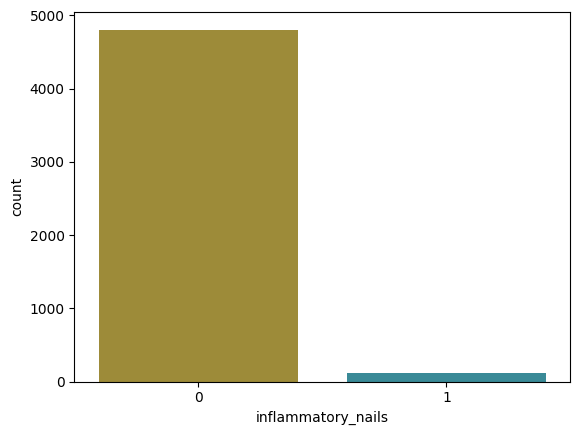

In [ ]:
sns.countplot(x='inflammatory_nails', data=train, palette=(["#ad9529", "#2b95a6"]))

<Axes: xlabel='continuous_sneezing', ylabel='count'>

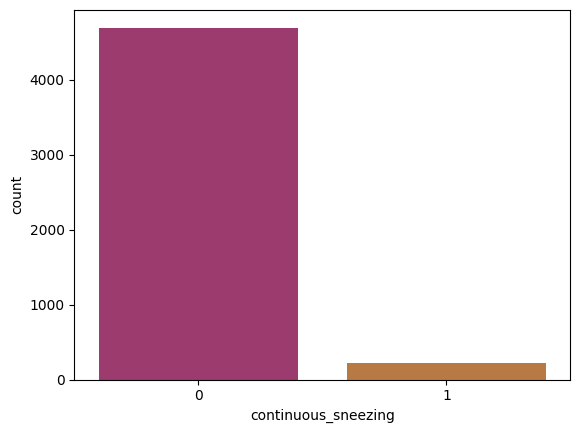

In [ ]:
sns.countplot(x='continuous_sneezing', data=train, palette=(['#ab2b6f','#cb7832']))

<Axes: xlabel='stomach_pain', ylabel='count'>

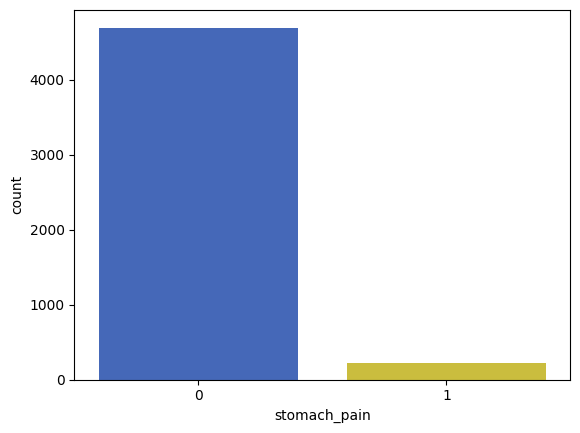

In [ ]:
sns.countplot(x='stomach_pain', data=train, palette=(['#3260cb','#e1d027']))

In [ ]:
groupping=train.groupby("prognosis")[["continuous_sneezing", "yellow_crust_ooze", "stomach_pain", "shivering"]].nunique().sort_values(by="yellow_crust_ooze", ascending=True)
groupping

,continuous_sneezing,yellow_crust_ooze,stomach_pain,shivering
prognosis,,,,
(vertigo) Paroymsal Positional Vertigo,1,1,1,1
AIDS,1,1,1,1
Acne,1,1,1,1
Alcoholic hepatitis,1,1,1,1
Allergy,2,1,1,2
Arthritis,1,1,1,1
Bronchial Asthma,1,1,1,1
Cervical spondylosis,1,1,1,1
Chicken pox,1,1,1,1


**Models**


In [ ]:
le = LabelEncoder()
train["prognosis"] = le.fit_transform(train["prognosis"])

In [ ]:
data_train = train.drop("prognosis",axis=1)
target = train["prognosis"]
data_train.shape, target.shape

((4920, 132), (4920,))

Kfold

In [ ]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

score = cross_val_score(clf, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)

print(score)

[1. 1. 1. 1. 1.]


In [ ]:
round(np.mean(score)*100, 2)

100.0

Decision Tree

In [ ]:
clf2 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
scoring = 'accuracy'
score = cross_val_score(clf2, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95731707 0.95223577 0.93597561 0.94410569 0.94715447]


In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

94.74

Random forest

In [ ]:
clf3 = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf3, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.91463415 0.89837398 0.87398374 0.89329268 0.94308943]


In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

90.47

Naive Bayes


In [ ]:
clf4 = GaussianNB(var_smoothing=100)
scoring = 'accuracy'
score = cross_val_score(clf4, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.91260163 0.88719512 0.94715447 0.91971545 0.91056911]


In [ ]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

91.54

GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
scoring = 'accuracy'
score = cross_val_score(gbc, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9949187  0.99390244 0.99695122 0.99288618 0.99288618]


In [ ]:
round(np.mean(score)*100,2)

99.43

SVM

In [ ]:
clf5 = SVC( kernel="rbf", random_state= 0 , probability=True)
scoring = 'accuracy'
score = cross_val_score(clf5, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1.]


In [ ]:
round(np.mean(score)*100,2)

100.0

AdaBoostClassifier

In [ ]:
clf6 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
scoring = 'accuracy'
score = cross_val_score(clf6, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.9847561  0.9847561  0.98577236 0.95426829 0.9898374 ]


In [ ]:
round(np.mean(score)*100,2)

97.99

XGBClassifier

In [ ]:
clf7 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
scoring = 'accuracy'
score = cross_val_score(clf7, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.99390244 0.9949187  0.9949187  0.9898374  0.99796748]


In [ ]:
round(np.mean(score)*100, 2)

99.43

Voting

In [ ]:
clf8 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
clf9 = GaussianNB(var_smoothing=100)
clf10 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
clf11 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)

In [ ]:
v_clf55 = VotingClassifier(estimators=[("AdaBoostClassifier" , clf8) , ('GaussianNB' , clf9) ,
                                     ("GradientBoostingClassifier" , clf10) ,("DecisionTreeClassifier" , clf11)] , voting = "hard")

scoring = 'accuracy'
score = cross_val_score(v_clf55, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1.         1.         0.99796748 0.99695122 0.99695122]


In [ ]:
round(np.mean(score)*100, 2)

99.84

Train test split

In [ ]:
x = train.drop("prognosis",axis=1)
y = train['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

LogisticRegression

In [ ]:
LogR = LogisticRegression(random_state = 42)

In [ ]:
LogR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = LogR.predict(x_test)

In [ ]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 79]]
100.0


In [ ]:
print(LogR.score(x_test , y_test)*100)

100.0


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4 )

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 79]]
100.0


In [ ]:
print(knn.score(x_test , y_test)*100)

100.0


SVM

In [ ]:
svm1 = SVC(kernel = 'poly', random_state = 0)
svm1.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = svm1.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 79]]
100.0


In [ ]:
print(svm1.score(x_test , y_test)*100)

100.0


DecisionTreeClassifier

In [ ]:
Dtc = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, random_state=42)

In [ ]:
y_pred = Dtc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 77]]
92.78455284552845


In [ ]:
print(Dtc.score(x_test , y_test)*100)

92.78455284552845


Random Forest

In [ ]:
Rf = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
Rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=80,
                       random_state=0)

In [ ]:
y_pred = Rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 60  0 ...  4  0  0]
 [ 0  0  0 ...  5  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 79]]
85.56910569105692


In [ ]:
print(Rf.score(x_test , y_test)*100)

85.56910569105692


XGBOOST

In [ ]:
xgb = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 79]]
98.81436314363144


In [ ]:
print(xgb.score(x_test , y_test)*100)

98.81436314363144


GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=2, max_features=3,
                           n_estimators=50, random_state=42)

In [ ]:
y_pred = gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 79]]
99.35636856368563


In [ ]:
print(gbc.score(x_test , y_test)*100)

99.35636856368563


AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=100)

In [ ]:
y_pred = ada.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 79]]
97.2560975609756


In [ ]:
print(ada.score(x_test , y_test)*100)

97.2560975609756


Voting

In [ ]:
clf1 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
clf2 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
clf3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)

In [ ]:
v_clf = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                                     ("GradientBoostingClassifier" , clf3) ,("AdaBoostClassifier" , clf4)] , voting = "soft")

In [ ]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=2,
                                                         max_features=3,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_rate=0.02,
                                                 n_estimators=100))],
                 voting='soft')

In [ ]:
y_pred = v_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[63  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 79]]
98.6449864498645


In [ ]:
v_clf.score(x_test , y_test)

0.986449864498645

Testing

In [ ]:
target = le.inverse_transform(target)
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:

testing = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                             ("GradientBoostingClassifier" , clf3) ,("AdaBoostClassifier" , clf4)] , voting = "soft")

model = testing.fit(data_train, target)

test_data = test.drop("prognosis", axis=1).copy()
prediction = testing.predict(test_data)


In [ ]:
prediction

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype=object)

In [ ]:
custom_data=pd.read_csv("custom_input.csv")

In [ ]:
predicted_data=model.predict(test_data)

print(predicted_data)

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo'
 'Fungal infection']


In [ ]:
submission = test.join(pd.DataFrame(model.predict(test_data),columns=["predicted"]))[["prognosis","predicted"]]
submission.to_csv('subm1.csv', index=False)

In [ ]:
submission

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


Saveing the model

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'all_disease_prediction.pkl')

['all_disease_prediction.pkl']